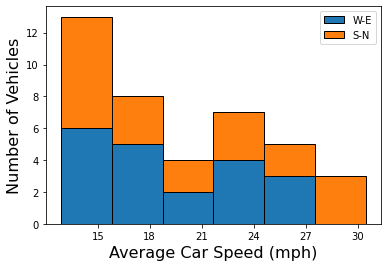

In [21]:
#file to import results, process them, and get some outputs from which I can analyse.

#hodge podge of imports, defo wont need them all but will need some
import os
import xlrd
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.optimize import curve_fit
from matplotlib.ticker import MaxNLocator 
import matplotlib.ticker as plticker
#df = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\4th year\\4yp\\Results\\default2020.csv",)
#df.drop(df.index[0:58],inplace=True) #should be same for every dataset I save 
#df.drop("run",axis=1,inplace=True)
#df.drop("type",axis=1,inplace=True)
#df.drop("attrname",axis=1,inplace=True)
#df.drop("attrvalue",axis=1,inplace=True)
#df.drop("value",axis=1,inplace=True)
#df = df.assign(module = lambda x: x['module'].str.extract('(\d+)')) #extracts number from string
#df["classification"] = ""
#df["module"] = df['module'].astype(str).astype(int)
#df = df.rename(columns={'vectime': 'time', 'vecvalue': 'value'})
#df.to_csv('stopstart1822e.csv', index=False)


df = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\4th year\\4yp\\Results\\stopstart2020e.csv",)
#df = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\4th year\\4yp\\Results\\stopstart2218e.csv",)
df = df.rename(columns={'module': 'car','name':'param'})
df = df.replace(' ',',', regex=True)
df["class"] = ""

for i in range(len(df)):
    a = eval(df.iloc[i]['value'])
    b = df.iloc[i]['car']
    if df.iloc[i]['param'] == "posx" and a[0] < 100:
        df.at[df["car"] == b,'class'] = "left"

    if df.iloc[i]['param'] == "posy" and a[0] > 400:
        df.at[df["car"] == b,'class'] = "bottom"
df.drop(df.index[df["param"] != "speed"],inplace=True) #should be same for every dataset I save 


df_left = df[df["class"] == "left"]
df_bottom = df[df["class"] == "bottom"]

listt = []
lists = []
veh_t = []
stop = []
avg_speed = []
for i in range(len(df_left)):
    time_list_elements = list(eval(df_left.iloc[i]['time']))#time stamps for each vehicle 
    speed_list_elements = list(eval(df_left.iloc[i]['value']))#speed stamps for each vehicle
    listt.append(time_list_elements)#lol time
    lists.append(speed_list_elements)#lol speed
    stop_element = sum(i < 5 for i in speed_list_elements)
    stop.append(stop_element)
    avg_speed.append(st.mean(speed_list_elements))
    veh_t.append( time_list_elements[-1] - time_list_elements[0])


time_max = max([listelement[-1] for listelement in listt])
time_min = min([listelement[0] for listelement in listt])
sim_time = time_max - time_min
mean_veh_time = st.mean(veh_t)
mean_stop_time = st.mean(stop)
max_stop_time = max(stop)
max_veh_time = max(veh_t)
min_veh_time = min(veh_t)
median_veh_time = st.median(veh_t)
mean_veh_speed = st.mean(avg_speed)




listt2 = []
lists2 = []
veh_t2 = []
stop2 = []
avg_speed2 = []
for i in range(len(df_bottom)):
    time_list_elements2 = list(eval(df_bottom.iloc[i]['time']))#time stamps for each vehicle 
    speed_list_elements2 = list(eval(df_bottom.iloc[i]['value']))#speed stamps for each vehicle
    listt2.append(time_list_elements2)#lol time
    lists2.append(speed_list_elements2)#lol speed
    stop_element2 = sum(i < 5 for i in speed_list_elements2)
    stop2.append(stop_element2)
    avg_speed2.append(st.mean(speed_list_elements2))
    veh_t2.append( time_list_elements2[-1] - time_list_elements2[0])


time_max2 = max([listelement2[-1] for listelement2 in listt2])
time_min2 = min([listelement2[0] for listelement2 in listt2])
sim_time2 = time_max2 - time_min2
mean_veh_time2 = st.mean(veh_t2)
mean_stop_time2 = st.mean(stop2)
max_stop_time2 = max(stop2)
max_veh_time2 = max(veh_t2)
min_veh_time2 = min(veh_t2)
median_veh_time2 = st.median(veh_t2)
mean_veh_speed2 = st.mean(avg_speed2)


#combined_list = [veh_t,veh_t2]


avg_speed = [x * 2.237 for x in avg_speed]
avg_speed2 = [x * 2.237 for x in avg_speed2]
combined_list = [avg_speed,avg_speed2]
#combined_list = [stop,stop2]
labels = ['W-E','S-N']

fig, ax = plt.subplots()
#try and get histogram working if possible

plt.hist(combined_list, bins=6, histtype='bar',  stacked = True, edgecolor='black',label = labels)
plt.legend()
plt.xlabel('Average Car Speed (mph)', fontsize = 16)
plt.ylabel('Number of Vehicles', fontsize = 16)

loc = plticker.MultipleLocator(base=3.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.show()
#plt.title('Histogram showing average vehicle speed in simulation', fontsize = 16)
#plt.ylim((0,17.9))

#plt.title('Time taken for vehicles to move through simulation', fontsize = 16)
#handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [low,medium]]
#labels = ["East-West","South-North"]
#plt.legend(handles,labels)



#note to self, next job is to add legend to histogram, 

